In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
wego = pd.read_csv('../data/wego_data.csv')

In [4]:
wego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

### Question 1: What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [5]:
(
    wego
    [[
        
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    
).head()

,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1
4,2023-08-01 05:15:00,2023-08-01 05:16:35,-1.583333,0,0,1


plan: % of ontime vs. not ontime
% of early vs ontime
% of late vs ontime
check that all rows add to sum of 1

In [6]:
wego.ADJUSTED_ONTIME_COUNT.value_counts()

ADJUSTED_ONTIME_COUNT
1    270048
0     80281
Name: count, dtype: int64

In [7]:
wego.ADJUSTED_ONTIME_COUNT.count()

350329

In [8]:
wego.ADJUSTED_ONTIME_COUNT.value_counts(normalize=True)

ADJUSTED_ONTIME_COUNT
1    0.770841
0    0.229159
Name: proportion, dtype: float64

### 77% on time

In [9]:
wego['ADJUSTED_EARLY_COUNT'].value_counts()

ADJUSTED_EARLY_COUNT
0    340554
1      9775
Name: count, dtype: int64

In [10]:
wego['ADJUSTED_EARLY_COUNT'].count()

350329

In [11]:
wego['ADJUSTED_EARLY_COUNT'].value_counts(normalize=True)

ADJUSTED_EARLY_COUNT
0    0.972098
1    0.027902
Name: proportion, dtype: float64

### 2.8% of trips were early

In [12]:
wego['ADJUSTED_LATE_COUNT'].value_counts()

ADJUSTED_LATE_COUNT
0    291291
1     59038
Name: count, dtype: int64

In [13]:
wego['ADJUSTED_LATE_COUNT'].count()

350329

In [14]:
wego['ADJUSTED_LATE_COUNT'].value_counts(normalize=True)

ADJUSTED_LATE_COUNT
0    0.831478
1    0.168522
Name: proportion, dtype: float64

### 16.9% of trips were late 

In [14]:
#trips not accounted for in late & early columns??
9775 + 59038

68813

(-10.0, 10.0)

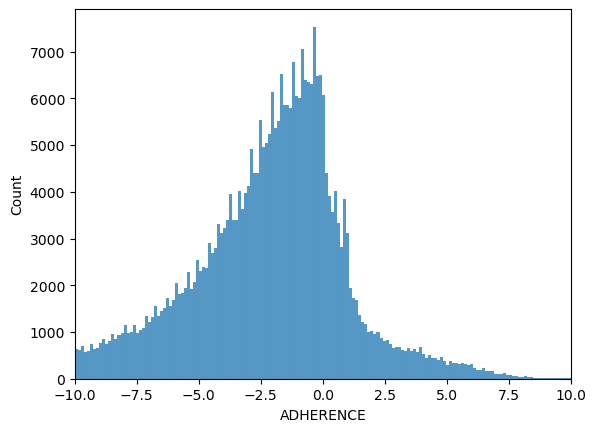

In [15]:
sns.histplot(data=wego, x='ADHERENCE')
plt.xlim(left=-10, right=10)

In [16]:
wego['ADHERENCE'].min()

-948.533333

In [17]:
wego['ADHERENCE'].max()

88.383333

In [18]:
wego['ADHERENCE'].value_counts().sort_values(ascending=False)

ADHERENCE
 0.966666      1355
 0.950000      1341
-0.166666      1082
-0.200000      1042
-0.100000      1033
               ... 
-128.100000       1
-128.550000       1
-125.066666       1
-115.900000       1
 13.366666        1
Name: count, Length: 3765, dtype: int64

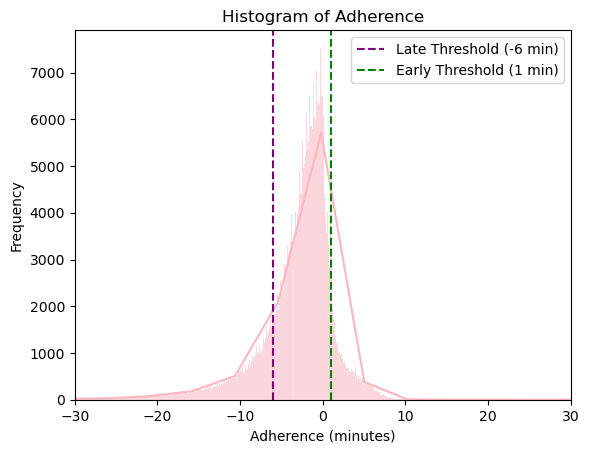

In [19]:
sns.histplot(wego['ADHERENCE'], kde=True, color='lightpink')
plt.title('Histogram of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Frequency')
plt.axvline(x=-6, color='purple', linestyle='--', label='Late Threshold (-6 min)')  # Adding a line indicating late threshold
plt.axvline(x=1, color='green', linestyle='--', label='Early Threshold (1 min)')  # Addin a line indicating early threshold
plt.xlim(left=-30, right=30)
plt.legend()

(-30.0, 30.0)

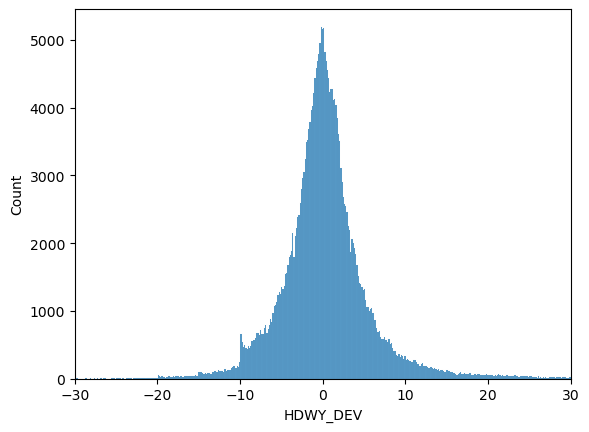

In [20]:
#this doesn't give accurate info
sns.histplot(data=wego, x='HDWY_DEV')
plt.xlim(left=-30, right=30)

In [21]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN


In [22]:
wego['hdwy_dev_pct'] = wego['HDWY_DEV']/wego['SCHEDULED_HDWY']

In [23]:
wego[['HDWY_DEV', 'SCHEDULED_HDWY', 'hdwy_dev_pct' ]]

,HDWY_DEV,SCHEDULED_HDWY,hdwy_dev_pct
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
350324,5.266666,30.0,0.175556
350325,NaN,NaN,NaN
350326,1.866666,30.0,0.062222
350327,17.500000,30.0,0.583333


In [25]:
#fixing unclean headway data:
clean_hdway = (
    wego
    .loc[wego['SCHEDULED_HDWY']!=0])

clean_hdway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.500000,NaN,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,0.000000,NaN,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,NaN,0,0.000000,NaN,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,0,0,1,0,0.0,0,12.866666,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,5.266666,0,1,0,0,0.0,0,0.000000,NaN,0.175556
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,1,0,0,NaN,0,0.000000,NaN,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,1.866666,0,0,1,0,0.0,0,0.000000,NaN,0.062222
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,17.500000,0,1,0,0,0.0,0,0.000000,NaN,0.583333


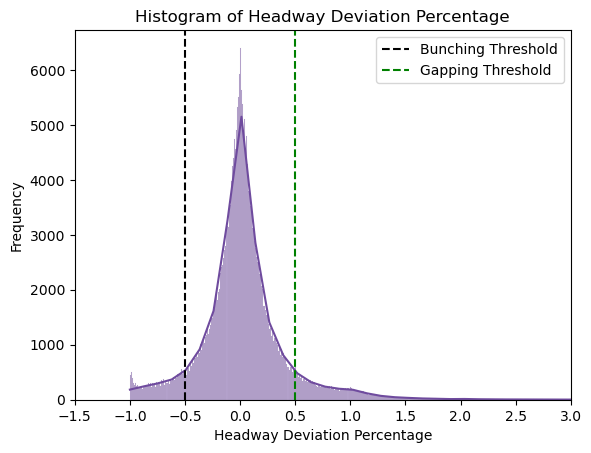

In [26]:
sns.histplot(data=clean_hdway, x='hdwy_dev_pct', kde=True, color='#6F4B9E')
plt.title('Histogram of Headway Deviation Percentage')
plt.xlabel('Headway Deviation Percentage')
plt.ylabel('Frequency')
plt.axvline(x=-0.5, color='black', linestyle='--', label='Bunching Threshold')  # Adding a line indicating early threshold
plt.axvline(x=0.5, color='green', linestyle='--', label='Gapping Threshold')  # Adding a line indicating late threshold
plt.xlim(left=-1.5, right=3)
plt.legend()

### Q2. How does direction of travel, route, or location affect the headway and on-time performance?

In [27]:
#direction of travel: 'ROUTE_DIRECTION_NAME'
clean_hdway['ROUTE_DIRECTION_NAME'].value_counts()

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    185793
TO DOWNTOWN      164428
Name: count, dtype: int64

In [28]:
#finding any null values
clean_hdway['ROUTE_DIRECTION_NAME'].isnull().value_counts()

ROUTE_DIRECTION_NAME
False    350221
Name: count, dtype: int64

In [29]:
clean_hdway.hdwy_dev_pct.describe()

count    265847.000000
mean          0.031625
std           0.466668
min          -1.000000
25%          -0.141667
50%           0.001754
75%           0.155000
max          24.175000
Name: hdwy_dev_pct, dtype: float64

In [61]:
#finding unclean data
# (
#     wego
#     .loc[wego['hdwy_dev_pct']>100]
#     [['hdwy_dev_pct','HDWY_DEV','SCHEDULED_HDWY']] 
# )

,hdwy_dev_pct,HDWY_DEV,SCHEDULED_HDWY
46637,inf,11.416666,0.0
46643,inf,0.650000,0.0
48742,inf,6.983333,0.0
55236,inf,3.800000,0.0
55250,inf,0.066666,0.0
61749,inf,0.583333,0.0
76138,inf,1.266666,0.0
95638,inf,9.683333,0.0
99700,inf,0.300000,0.0
100038,inf,2.050000,0.0


In [81]:
#108 rows where scheduled headway = 0 ; all have trip edge of 1
#this is the problem with the highway deviation % data

# (
#     wego
#     .loc[wego['SCHEDULED_HDWY']==0]
#     .loc[wego['TRIP_EDGE']==1]
#     [['ROUTE_ABBR', 'DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
#       'SCHEDULED_TIME', 'SCHEDULED_HDWY',
#       'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV', 'hdwy_dev_pct', 'OPERATOR']] 
# )

,ROUTE_ABBR,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV,hdwy_dev_pct,OPERATOR
42265,50,2023-08-08,351236,MLKS,TO DOWNTOWN,1,2023-08-08 15:10:00,0.0,2023-08-08 15:11:58,NaN,NaN,NaN,2586
46637,55,2023-08-08,353988,ARTS,TO DOWNTOWN,1,2023-08-08 15:12:00,0.0,2023-08-08 15:14:13,11.416666,11.416666,inf,2547
46643,56,2023-08-08,354106,MEIG,TO DOWNTOWN,1,2023-08-08 15:20:00,0.0,2023-08-08 15:23:34,0.650000,0.650000,inf,2603
48742,50,2023-08-09,351236,MLKS,TO DOWNTOWN,1,2023-08-09 15:10:00,0.0,2023-08-09 15:11:32,6.983333,6.983333,inf,2586
48756,56,2023-08-09,351239,MEIG,TO DOWNTOWN,1,2023-08-09 15:20:00,0.0,2023-08-09 15:20:20,NaN,NaN,NaN,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339622,55,2023-09-28,353988,ARTS,TO DOWNTOWN,1,2023-09-28 15:12:00,0.0,2023-09-28 15:14:54,NaN,NaN,NaN,2821
339628,56,2023-09-28,354106,MEIG,TO DOWNTOWN,1,2023-09-28 15:20:00,0.0,2023-09-28 15:22:34,2.283333,2.283333,inf,1880
341727,50,2023-09-29,351236,MLKS,TO DOWNTOWN,1,2023-09-29 15:10:00,0.0,2023-09-29 15:17:54,8.850000,8.850000,inf,1889
346163,55,2023-09-29,353988,ARTS,TO DOWNTOWN,1,2023-09-29 15:12:00,0.0,2023-09-29 15:14:34,0.150000,0.150000,inf,1598


In [30]:
#creating columns to show bunching, gapping, and acceptable range of headway

clean_hdway['bunching'] = np.where(clean_hdway['hdwy_dev_pct']<-0.5, 1, 0)
clean_hdway['gapping'] = np.where(clean_hdway['hdwy_dev_pct']>0.5, 1, 0)
clean_hdway['acceptable_hdwy'] = np.where((clean_hdway['hdwy_dev_pct']>=-0.5) & (clean_hdway['hdwy_dev_pct']<=0.5), 1, 0)
clean_hdway.head(20)


C:\Users\emily\AppData\Local\Temp\ipykernel_32432\2308747302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hdway['bunching'] = np.where(clean_hdway['hdwy_dev_pct']<-0.5, 1, 0)
C:\Users\emily\AppData\Local\Temp\ipykernel_32432\2308747302.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hdway['gapping'] = np.where(clean_hdway['hdwy_dev_pct']>0.5, 1, 0)
C:\Users\emily\AppData\Local\Temp\ipykernel_32432\2308747302.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct,bunching,gapping,acceptable_hdwy
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,6.500000,NaN,NaN,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,12.866666,5.0,NaN,0,0,0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,NaN,0,0,0
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,1,0,NaN,0,0.000000,NaN,NaN,0,0,0
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,13.216666,10.0,0.076190,0,0,1
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,0.056190,0,0,1
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,1,0,0.0,0,0.000000,NaN,-0.032222,0,0,1


In [31]:
clean_hdway.bunching.value_counts(normalize=True)

bunching
0    0.948607
1    0.051393
Name: proportion, dtype: float64

In [32]:
clean_hdway.gapping.value_counts(normalize=True)

gapping
0    0.937382
1    0.062618
Name: proportion, dtype: float64

In [33]:
clean_hdway.acceptable_hdwy.value_counts(normalize=True)

acceptable_hdwy
1    0.645073
0    0.354927
Name: proportion, dtype: float64

In [34]:
clean_hdway['HDWY_DEV'].isnull().value_counts()

HDWY_DEV
False    265847
True      84374
Name: count, dtype: int64

In [35]:
#quartiles for hdway dev pct

clean_hdway['hdwy_dev_pct'].quantile([0.25, 0.5, 0.75])

0.25   -0.141667
0.50    0.001754
0.75    0.155000
Name: hdwy_dev_pct, dtype: float64

In [36]:
#trying to explain outliers in headway deviation pct:
#most are located on west end route 3, a lot are during 3 PM hour; otherwise no discernable pattern which would allow us to exclude these from the dataset
(
    clean_hdway
    .loc[clean_hdway['hdwy_dev_pct']>10]
    [['ROUTE_ABBR', 'DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV', 'hdwy_dev_pct', 'PREV_SCHED_STOP_CANCELLED']] 
)


,ROUTE_ABBR,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV,hdwy_dev_pct,PREV_SCHED_STOP_CANCELLED
42201,3,2023-08-08,351225,WE23,FROM DOWNTOWN,0,2023-08-08 15:17:00,2.0,2023-08-08 15:31:34,23.916666,21.916666,10.958333,0.0
42202,3,2023-08-08,351225,WE31,FROM DOWNTOWN,0,2023-08-08 15:21:00,2.0,2023-08-08 15:36:15,24.200000,22.200000,11.100000,0.0
42203,3,2023-08-08,351225,HRWB,FROM DOWNTOWN,0,2023-08-08 15:33:00,2.0,2023-08-08 15:48:50,28.650000,26.650000,13.325000,0.0
53214,22,2023-08-10,349957,ELIZ,FROM DOWNTOWN,0,2023-08-10 16:44:00,50.0,2023-08-10 16:51:49,558.700000,508.700000,10.174000,0.0
55175,3,2023-08-10,351225,BRCJ,FROM DOWNTOWN,0,2023-08-10 15:51:00,2.0,2023-08-10 16:02:47,46.733333,44.733333,22.366667,0.0
82566,3,2023-08-15,351225,BRCJ,FROM DOWNTOWN,0,2023-08-15 15:51:00,2.0,2023-08-15 16:06:53,23.016666,21.016666,10.508333,0.0
89081,3,2023-08-16,351225,HRWB,FROM DOWNTOWN,0,2023-08-16 15:33:00,2.0,2023-08-16 15:45:23,25.083333,23.083333,11.541666,0.0
89082,3,2023-08-16,351225,BRCJ,FROM DOWNTOWN,0,2023-08-16 15:51:00,2.0,2023-08-16 16:01:34,42.716666,40.716666,20.358333,0.0
116466,3,2023-08-21,351225,BRCJ,FROM DOWNTOWN,0,2023-08-21 15:51:00,2.0,2023-08-21 15:58:08,26.916666,24.916666,12.458333,0.0
124778,52,2023-08-22,352309,DCSCC,TO DOWNTOWN,1,2023-08-22 16:02:00,42.0,2023-08-22 16:03:24,514.366666,472.366666,11.246825,0.0


In [37]:
#determining why max values are so high?
prev_stop_cancelled = (
    clean_hdway.loc
    [clean_hdway['PREV_SCHED_STOP_CANCELLED'] > 0.0]
    [['PREV_SCHED_STOP_CANCELLED','ROUTE_ABBR', 'DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'SCHEDULED_TIME', 'SCHEDULED_HDWY','ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV', 'hdwy_dev_pct']])

In [68]:
clean_hdway.groupby('ROUTE_DIRECTION_NAME')[['hdwy_dev_pct', 'bunching', 'gapping', 'acceptable_hdwy']].mean().sort_values('hdwy_dev_pct', ascending = False)


,hdwy_dev_pct,bunching,gapping,acceptable_hdwy
ROUTE_DIRECTION_NAME,,,,
FROM DOWNTOWN,0.036886,0.063269,0.073819,0.623931
TO DOWNTOWN,0.025648,0.037974,0.049961,0.668961


In [67]:
clean_hdway.groupby('ROUTE_DIRECTION_NAME')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT', ascending = False)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
ROUTE_DIRECTION_NAME,,,
TO DOWNTOWN,0.824330,0.027216,0.118173
FROM DOWNTOWN,0.723461,0.028478,0.213146


In [41]:
clean_hdway.ROUTE_ABBR.value_counts()

ROUTE_ABBR
55    61908
56    59984
52    51819
3     47162
50    43255
23    42108
22    25959
7     18026
Name: count, dtype: int64

In [66]:
clean_hdway.groupby('ROUTE_ABBR')[['hdwy_dev_pct', 'bunching', 'gapping', 'acceptable_hdwy']].mean().sort_values('hdwy_dev_pct', ascending = False)


,hdwy_dev_pct,bunching,gapping,acceptable_hdwy
ROUTE_ABBR,,,,
3,0.056278,0.046202,0.062423,0.667062
23,0.054504,0.017336,0.046214,0.612758
52,0.041635,0.058068,0.073873,0.637797
22,0.033891,0.011441,0.028468,0.615239
55,0.025342,0.106109,0.104478,0.587630
7,0.021907,0.025685,0.034117,0.582492
56,0.013182,0.061616,0.066568,0.677297
50,0.012045,0.024413,0.032297,0.742781


In [65]:
clean_hdway.groupby('ROUTE_ABBR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT', ascending = False)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
ROUTE_ABBR,,,
22,0.866443,0.024308,0.079549
50,0.838770,0.027789,0.118137
23,0.834450,0.030541,0.076708
56,0.805698,0.029191,0.147306
7,0.744314,0.024021,0.189560
3,0.731860,0.029303,0.203342
52,0.728227,0.029970,0.193713
55,0.679218,0.024682,0.270498


In [229]:
clean_hdway.TIME_POINT_ABBR.unique()

array(['MHSP', 'ELIZ', 'CV23', 'MCC5_10', 'CLFF', 'HPKL', 'YGKG',
       '25ACLARK', 'DWMRT', 'EDBC', 'DKTL', 'N1SP', 'MCC4_24', 'WHBG',
       'HRWB', 'WE31', 'WE23', 'MCC5_5', 'BRCJ', 'MP&R', 'HBHS', '21BK',
       'MCC5_12', 'WALM', 'HLWD', 'CH46', '28&CHARL', 'MCC5_1', 'HCKP',
       'WMRT', 'THNV', 'NVFG', 'MCC4_19', 'LINWAL', 'DCSCC', 'HDANT',
       'HHWM', 'MXBELL', 'MXDONEL', 'MXTHOMP', 'MXWHARF', 'MCC4_15',
       'GXRVRGAT', 'GXMADISO', 'GXGRNFLD', 'GXFIVEPT', 'MCC4_18', 'SAMS',
       'MCC5_9', 'MCC5_6', 'MCC4_20', 'MCC4_13', 'MEIG', 'MCC4_22',
       'MLKS', 'MCC5_11', 'ARTS', 'MCC5_7', 'MCC5_2', 'HEAD', 'CRES'],
      dtype=object)

In [230]:
clean_hdway.TIME_POINT_ABBR.value_counts().reset_index()

,TIME_POINT_ABBR,count
0,GXRVRGAT,14954
1,DWMRT,14085
2,WHBG,11602
3,MXTHOMP,10384
4,MXWHARF,10382
...,...,...
56,ARTS,73
57,MCC4_13,72
58,MCC5_12,43
59,MCC5_7,36


In [64]:
clean_hdway.groupby('TIME_POINT_ABBR')[['hdwy_dev_pct', 'bunching', 'gapping', 'acceptable_hdwy']].mean().sort_values('hdwy_dev_pct' , ascending = False).head(20)


,hdwy_dev_pct,bunching,gapping,acceptable_hdwy
TIME_POINT_ABBR,,,,
DCSCC,0.415541,0.038952,0.183473,0.347652
CLFF,0.141441,0.000564,0.067080,0.588501
BRCJ,0.115575,0.022967,0.056938,0.850000
EDBC,0.099209,0.010186,0.074113,0.801194
ELIZ,0.091650,0.002950,0.011799,0.637168
N1SP,0.067301,0.022521,0.065419,0.828885
HRWB,0.055265,0.070680,0.087448,0.793898
MCC5_5,0.053515,0.020974,0.029364,0.429504
DKTL,0.052193,0.020615,0.064943,0.848785


In [62]:
clean_hdway.groupby('TIME_POINT_ABBR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT', ascending = False)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
TIME_POINT_ABBR,,,
MCC5_6,0.974576,0.000000,0.008475
25ACLARK,0.949573,0.007320,0.015453
MCC5_10,0.938920,0.003876,0.041433
MCC4_24,0.905982,0.005481,0.043375
MEIG,0.890411,0.041096,0.054795
...,...,...,...
MCC5_12,0.372093,0.000000,0.534884
DCSCC,0.371678,0.045504,0.254459
MCC5_11,0.283784,0.000000,0.662162


### Q3. How does time of day or day of week affect headway and on-time performance?

In [52]:
#converting columns to datetime
clean_hdway['SCHEDULED_TIME'] = pd.to_datetime(clean_hdway['SCHEDULED_TIME']) 
clean_hdway['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(clean_hdway['ACTUAL_ARRIVAL_TIME']) 
clean_hdway['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(clean_hdway['ACTUAL_DEPARTURE_TIME']) 
clean_hdway.info()

C:\Users\emily\AppData\Local\Temp\ipykernel_32432\4217779165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hdway['SCHEDULED_TIME'] = pd.to_datetime(clean_hdway['SCHEDULED_TIME'])


<class 'pandas.core.frame.DataFrame'>
Index: 350221 entries, 0 to 350328
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CALENDAR_ID                350221 non-null  int64         
 1   SERVICE_ABBR               350221 non-null  int64         
 2   ADHERENCE_ID               350221 non-null  int64         
 3   DATE                       350221 non-null  object        
 4   ROUTE_ABBR                 350221 non-null  int64         
 5   BLOCK_ABBR                 350221 non-null  int64         
 6   OPERATOR                   350221 non-null  int64         
 7   TRIP_ID                    350221 non-null  int64         
 8   OVERLOAD_ID                350221 non-null  int64         
 9   ROUTE_DIRECTION_NAME       350221 non-null  object        
 10  TIME_POINT_ABBR            350221 non-null  object        
 11  ROUTE_STOP_SEQUENCE        350210 non-null  float64      

C:\Users\emily\AppData\Local\Temp\ipykernel_32432\4217779165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hdway['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(clean_hdway['ACTUAL_ARRIVAL_TIME'])
C:\Users\emily\AppData\Local\Temp\ipykernel_32432\4217779165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hdway['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(clean_hdway['ACTUAL_DEPARTURE_TIME'])


In [53]:
clean_hdway['day_name'] = clean_hdway['SCHEDULED_TIME'].dt.day_name()  

C:\Users\emily\AppData\Local\Temp\ipykernel_32432\2375452118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hdway['day_name'] = clean_hdway['SCHEDULED_TIME'].dt.day_name()


In [54]:
clean_hdway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct,bunching,gapping,acceptable_hdwy,day_name
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,6.500000,NaN,NaN,0,0,0,Tuesday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,NaN,0,0,0,Tuesday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,NaN,0,0,0,Tuesday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,NaN,0,0.000000,NaN,NaN,0,0,0,Tuesday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0.0,0,12.866666,5.0,NaN,0,0,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,0.175556,0,0,1,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0,NaN,0,0.000000,NaN,NaN,0,0,0,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.0,0,0.000000,NaN,0.062222,0,0,1,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0,0.0,0,0.000000,NaN,0.583333,0,1,0,Saturday


In [55]:
clean_hdway.groupby('day_name')[['acceptable_hdwy', 'hdwy_dev_pct', 'bunching', 'gapping']].mean().sort_values('acceptable_hdwy', ascending = False)

,acceptable_hdwy,hdwy_dev_pct,bunching,gapping
day_name,,,,
Saturday,0.696633,0.023550,0.027181,0.037434
Sunday,0.689304,0.036036,0.017746,0.034151
Monday,0.670217,0.022874,0.045861,0.052804
Tuesday,0.642911,0.028584,0.055506,0.065532
Wednesday,0.637573,0.027769,0.059026,0.067197
Thursday,0.622782,0.037819,0.060291,0.073503
Friday,0.599945,0.042787,0.068484,0.083436


In [60]:
clean_hdway.groupby('day_name')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT', ascending = False)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
day_name,,,
Monday,0.820800,0.032923,0.123388
Sunday,0.802445,0.029380,0.121540
Tuesday,0.779023,0.028534,0.164406
Saturday,0.773930,0.021414,0.178837
Wednesday,0.768496,0.028051,0.176154
Thursday,0.753701,0.026920,0.182106
Friday,0.722028,0.027219,0.207076


In [57]:
clean_hdway['hour'] = clean_hdway['SCHEDULED_TIME'].dt.hour
clean_hdway

C:\Users\emily\AppData\Local\Temp\ipykernel_32432\1314666557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_hdway['hour'] = clean_hdway['SCHEDULED_TIME'].dt.hour


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,hdwy_dev_pct,bunching,gapping,acceptable_hdwy,day_name,hour
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,6.500000,NaN,NaN,0,0,0,Tuesday,4
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,0.000000,NaN,NaN,0,0,0,Tuesday,4
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.0,0,0.000000,NaN,NaN,0,0,0,Tuesday,4
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0.000000,NaN,NaN,0,0,0,Tuesday,5
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0.0,0,12.866666,5.0,NaN,0,0,0,Tuesday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0.0,0,0.000000,NaN,0.175556,0,0,1,Saturday,22
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,NaN,0,0.000000,NaN,NaN,0,0,0,Saturday,22
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0.0,0,0.000000,NaN,0.062222,0,0,1,Saturday,22
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0.0,0,0.000000,NaN,0.583333,0,1,0,Saturday,22


In [58]:
clean_hdway.groupby('hour')[['acceptable_hdwy', 'hdwy_dev_pct', 'bunching', 'gapping']].mean().sort_values('acceptable_hdwy', ascending = False)

,acceptable_hdwy,hdwy_dev_pct,bunching,gapping
hour,,,,
22,0.722924,0.033146,0.011767,0.035472
21,0.720376,0.017652,0.017021,0.030070
20,0.700727,0.023424,0.023592,0.038591
6,0.699550,0.029317,0.030681,0.042693
23,0.694348,0.035877,0.017472,0.039785
11,0.693212,0.024560,0.038349,0.050593
10,0.682025,0.014958,0.044853,0.053443
13,0.680173,0.023372,0.045189,0.058907
19,0.673898,0.023926,0.039972,0.052276


In [61]:
clean_hdway.groupby('hour')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT', ascending = False)

,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
hour,,,
4,0.917053,0.040603,0.022622
5,0.886967,0.035448,0.040703
6,0.868819,0.027027,0.072072
11,0.837398,0.027917,0.110442
10,0.834594,0.036654,0.102592
22,0.815254,0.024564,0.126084
9,0.812971,0.028537,0.128513
13,0.808201,0.028262,0.137659
12,0.808112,0.027233,0.138580


### Q4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

In [73]:
# of unique drivers
clean_hdway.OPERATOR.nunique()

341

In [87]:
#how many trips did each driver take?
driver_trips = clean_hdway.OPERATOR.value_counts().reset_index()
driver_trips

,OPERATOR,count
0,2352,2970
1,1266,2911
2,1147,2710
3,1133,2625
4,2424,2577
...,...,...
336,2256,6
337,56,3
338,473,2
339,0,1


In [101]:
driver_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   OPERATOR  341 non-null    int64
 1   count     341 non-null    int64
dtypes: int64(2)
memory usage: 5.5 KB


<Axes: xlabel='OPERATOR', ylabel='count'>

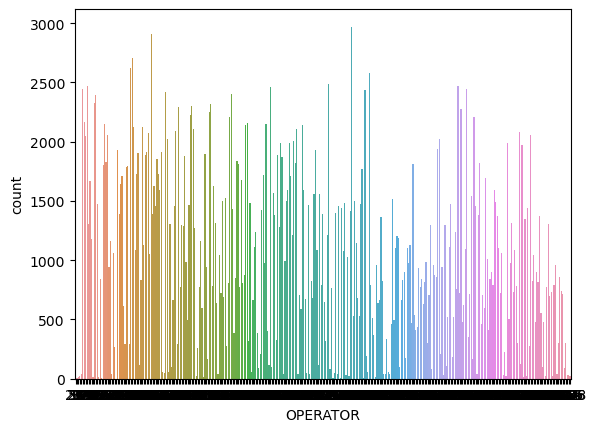

In [99]:
sns.barplot(
    x="OPERATOR", 
    y="count", 
    data=driver_trips)

In [102]:
#shows distribution of # of driver trips
driver_trips['count'].describe()

count     341.000000
mean     1027.041056
std       741.280171
min         1.000000
25%       390.000000
50%       941.000000
75%      1558.000000
max      2970.000000
Name: count, dtype: float64

In [74]:
#any null values for driver?
clean_hdway.OPERATOR.isnull().value_counts()
#no

OPERATOR
False    350221
Name: count, dtype: int64

In [92]:
#driver impact on headway
best_drivers_hdwy = clean_hdway.groupby('OPERATOR')[['acceptable_hdwy', 'hdwy_dev_pct', 'bunching', 'gapping']].mean().sort_values('acceptable_hdwy', ascending = False).head(20).reset_index()
best_drivers_hdwy

,OPERATOR,acceptable_hdwy,hdwy_dev_pct,bunching,gapping
0,3118,0.833333,-0.093333,0.000000,0.000000
1,3077,0.833333,0.045606,0.000000,0.000000
2,1078,0.816327,0.065029,0.000000,0.017007
3,1845,0.814815,0.158236,0.000000,0.018519
4,2440,0.809822,0.044304,0.005225,0.014629
5,1566,0.809267,-0.029176,0.014395,0.001799
6,3027,0.809211,-0.081693,0.016447,0.003289
7,2313,0.800000,0.070694,0.000000,0.000000
8,2876,0.793886,0.064611,0.007890,0.018738
9,2368,0.785985,0.142214,0.005682,0.034091


In [88]:
#add number of rows (stops?) represented in dataset for each driver

best_drivers_hdwy = best_drivers_hdwy.merge(driver_trips, how='inner', on='OPERATOR')
best_drivers_hdwy

,OPERATOR,acceptable_hdwy,hdwy_dev_pct,bunching,gapping,count
0,3118,0.833333,-0.093333,0.000000,0.000000,24
1,3077,0.833333,0.045606,0.000000,0.000000,12
2,1078,0.816327,0.065029,0.000000,0.017007,294
3,1845,0.814815,0.158236,0.000000,0.018519,54
4,2440,0.809822,0.044304,0.005225,0.014629,957
5,1566,0.809267,-0.029176,0.014395,0.001799,2223
6,3027,0.809211,-0.081693,0.016447,0.003289,304
7,2313,0.800000,0.070694,0.000000,0.000000,10
8,2876,0.793886,0.064611,0.007890,0.018738,1014
9,2368,0.785985,0.142214,0.005682,0.034091,528


In [89]:
worst_drivers_hdwy = clean_hdway.groupby('OPERATOR')[['acceptable_hdwy', 'hdwy_dev_pct', 'bunching', 'gapping']].mean().sort_values('acceptable_hdwy', ascending = True).head(20)
worst_drivers_hdwy

,acceptable_hdwy,hdwy_dev_pct,bunching,gapping
OPERATOR,,,,
0,0.000000,NaN,0.000000,0.000000
3080,0.000000,NaN,0.000000,0.000000
2435,0.000000,NaN,0.000000,0.000000
1377,0.000000,NaN,0.000000,0.000000
656,0.000000,-1.000000,1.000000,0.000000
623,0.000000,NaN,0.000000,0.000000
2423,0.000000,NaN,0.000000,0.000000
473,0.000000,NaN,0.000000,0.000000
2400,0.179894,0.026587,0.121693,0.063492


In [90]:
worst_drivers_hdwy = worst_drivers_hdwy.merge(driver_trips, how='inner', on='OPERATOR')
worst_drivers_hdwy

,OPERATOR,acceptable_hdwy,hdwy_dev_pct,bunching,gapping,count
0,0,0.000000,NaN,0.000000,0.000000,1
1,3080,0.000000,NaN,0.000000,0.000000,22
2,2435,0.000000,NaN,0.000000,0.000000,16
3,1377,0.000000,NaN,0.000000,0.000000,60
4,656,0.000000,-1.000000,1.000000,0.000000,1
5,623,0.000000,NaN,0.000000,0.000000,44
6,2423,0.000000,NaN,0.000000,0.000000,54
7,473,0.000000,NaN,0.000000,0.000000,2
8,2400,0.179894,0.026587,0.121693,0.063492,189
9,2982,0.181818,-0.214064,0.272727,0.121212,33


In [93]:
#best drivers for adherence
best_drivers_adh = clean_hdway.groupby('OPERATOR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT', ascending = False).head(20).reset_index()
best_drivers_adh

,OPERATOR,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
0,0,1.000000,0.000000,0.000000
1,56,1.000000,0.000000,0.000000
2,2294,1.000000,0.000000,0.000000
3,1706,0.977273,0.022727,0.000000
4,1597,0.976744,0.000000,0.023256
5,2639,0.971154,0.014423,0.009615
6,2573,0.968523,0.000000,0.029056
7,409,0.964107,0.003756,0.025459
8,2493,0.962963,0.018519,0.018519
9,2338,0.962963,0.037037,0.000000


In [94]:
#adding in # of rows per driver
best_drivers_adh = best_drivers_adh.merge(driver_trips, how='inner', on='OPERATOR')
best_drivers_adh

,OPERATOR,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,count
0,0,1.000000,0.000000,0.000000,1
1,56,1.000000,0.000000,0.000000,3
2,2294,1.000000,0.000000,0.000000,45
3,1706,0.977273,0.022727,0.000000,44
4,1597,0.976744,0.000000,0.023256,258
5,2639,0.971154,0.014423,0.009615,208
6,2573,0.968523,0.000000,0.029056,413
7,409,0.964107,0.003756,0.025459,2396
8,2493,0.962963,0.018519,0.018519,54
9,2338,0.962963,0.037037,0.000000,27


In [95]:
#worst drivers for adherence
worst_drivers_adh = clean_hdway.groupby('OPERATOR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT']].mean().sort_values('ADJUSTED_ONTIME_COUNT', ascending = True).head(20).reset_index()
worst_drivers_adh

,OPERATOR,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT
0,656,0.000000,0.000000,1.000000
1,473,0.000000,0.000000,0.500000
2,2982,0.060606,0.000000,0.787879
3,1016,0.171717,0.000000,0.292929
4,1377,0.200000,0.000000,0.800000
5,2094,0.225000,0.125000,0.600000
6,2137,0.227273,0.000000,0.250000
7,2400,0.238095,0.079365,0.370370
8,1389,0.320000,0.000000,0.150000
9,3165,0.375000,0.000000,0.625000


In [96]:
#adding in # of rows per driver
worst_drivers_adh = worst_drivers_adh.merge(driver_trips, how='inner', on='OPERATOR')
worst_drivers_adh

,OPERATOR,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,count
0,656,0.000000,0.000000,1.000000,1
1,473,0.000000,0.000000,0.500000,2
2,2982,0.060606,0.000000,0.787879,33
3,1016,0.171717,0.000000,0.292929,297
4,1377,0.200000,0.000000,0.800000,60
5,2094,0.225000,0.125000,0.600000,40
6,2137,0.227273,0.000000,0.250000,44
7,2400,0.238095,0.079365,0.370370,189
8,1389,0.320000,0.000000,0.150000,100
9,3165,0.375000,0.000000,0.625000,32


### Q5. Is there any relationship between lateness (ADHERENCE) and headway deviation?

(-100.0, 50.0)

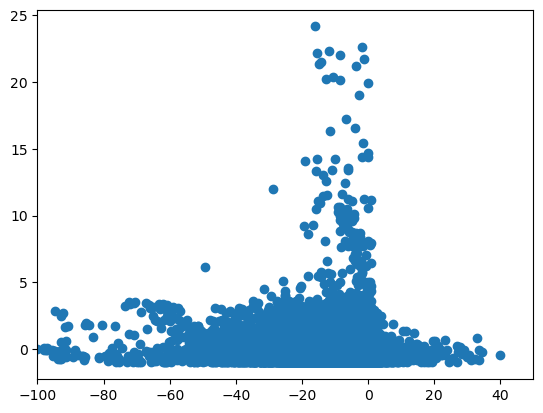

In [108]:
plt.scatter(clean_hdway.ADHERENCE, clean_hdway.hdwy_dev_pct)
plt.xlim(left=-100, right=50)

(-20.0, 20.0)

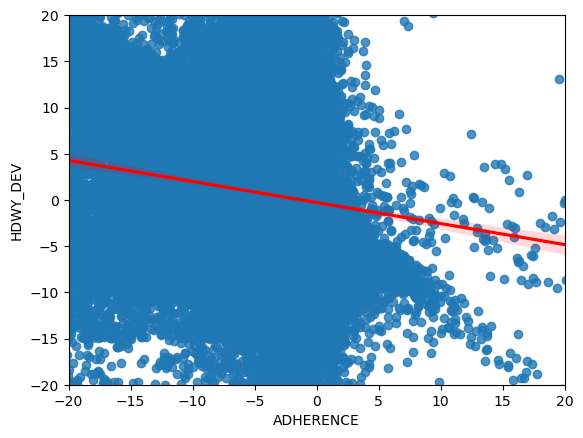

In [119]:
sns.regplot(
    x=wego["ADHERENCE"],
    y=wego["HDWY_DEV"],
    line_kws={"color": "r"}
)
plt.xlim(left=-20, right=20)
plt.ylim(top=20, bottom=-20)

<Axes: xlabel='ADHERENCE', ylabel='HDWY_DEV'>

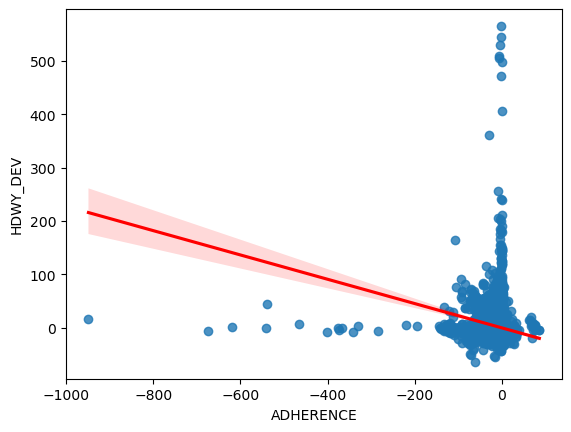

In [120]:
sns.regplot(
    x=wego["ADHERENCE"],
    y=wego["HDWY_DEV"],
    line_kws={"color": "r"}
)

#the later you are, the more likely you are to have gapping

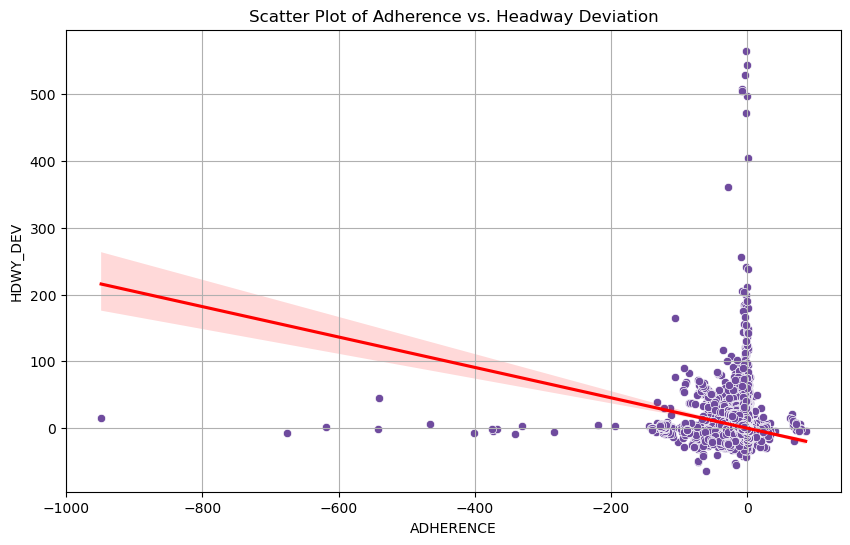

In [122]:
# Set up the figure
plt.figure(figsize=(10, 6))

# Scatter plot of ADHERENCE vs. HDWY_DEV
sns.scatterplot(x='ADHERENCE', y='HDWY_DEV', data=wego, color='#6F4B9E')
plt.title('Scatter Plot of Adherence vs. Headway Deviation')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Headway Deviation (minutes)')


# Regression line
sns.regplot(x='ADHERENCE', y='HDWY_DEV', data=wego, scatter=False, color='red')

plt.grid(True)
plt.show()